In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from icecream import ic

plt.rc('text', usetex=True)
plt.rc('font', family='STIXGeneral')

In [2]:
# peaks of spectra, initial guesses, helpful for later fitting
multiindex = [
    ["E", "E", "D1", "D1", "D2", "D2"],
    ["p1", "p2","p1", "p2", "p1", "p2"],
]
tuples = list(zip(*multiindex))
index = pd.MultiIndex.from_tuples(tuples, names=["Theoretical / Detector","Peak"])
source = pd.DataFrame({"na":[511,1275,480,1260,205,790],
                       "co":[1173.2,1332.5,1150,1300,700,810]}, index=index)
ic(source)
def peak(d,p,s):
    '''
    d: E, D1 or D2
    p: p1 or p2
    s: na or co
    example use: ic(peak('D1','p1','na'))
    '''
    return float(source.loc[(d,p),s])

def energyplot(data, peak1, title, peak2=None, color1='g', color2='r'):
    df = pd.read_csv(data)
    df.columns = ['counts']
    df.index.name = 'Kanal'
    df['counts'] = df.loc[df['counts'] > 0]
    sns.scatterplot(x=df.index, y=df['counts'], s=3, color='k')
    plt.title(title)
    if peak2 == None:
        plt.axvline(peak1, linewidth=.5, c=color1, label=f'peak bei {peak1}')
    else:
        plt.axvline(peak1, linewidth=.5, c=color1, label=f'peak1 bei {peak1}')
        plt.axvline(peak2, linewidth=.5, c=color2, label=f'peak2 bei {peak2}')
    
    plt.legend()
    plt.savefig(f"plots/{title}.pdf")
    plt.show()

ic| source:                                na      co
            Theoretical / Detector Peak              
            E                      p1     511  1173.2
                                   p2    1275  1332.5
            D1                     p1     480  1150.0
                                   p2    1260  1300.0
            D2                     p1     205   700.0
                                   p2     790   810.0


## Total energy spectra

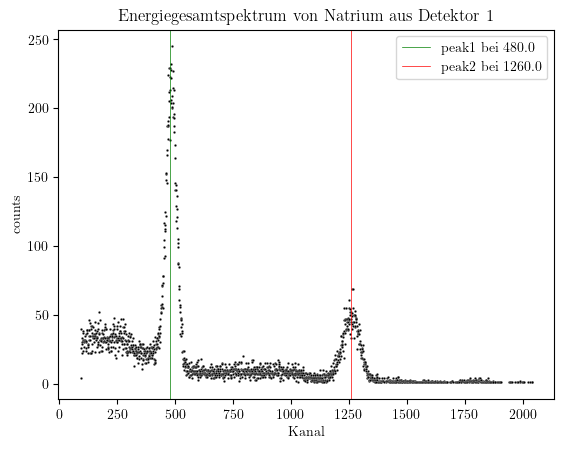

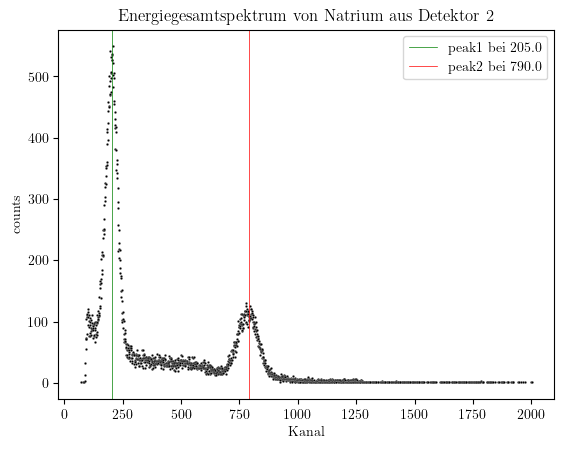

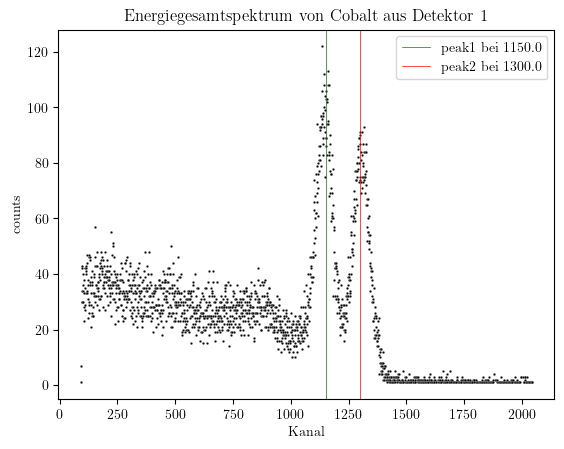

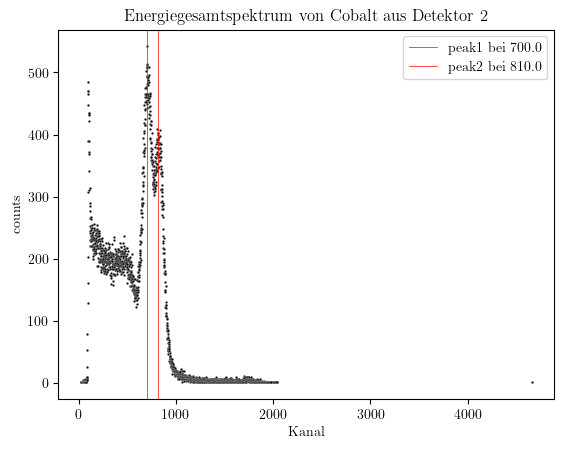

In [3]:
energyplot('Results/energiespektrum_natrium_detektor1.asc', peak('D1','p1','na'), 'Energiegesamtspektrum von Natrium aus Detektor 1', peak2=peak('D1','p2','na'))
energyplot('Results/energiespektrum_natrium_detektor2.asc', peak('D2','p1','na'), 'Energiegesamtspektrum von Natrium aus Detektor 2', peak2= peak('D2','p2','na'))
energyplot('Results/energiespektrum_cobalt_detektor1.asc', peak('D1','p1','co'), 'Energiegesamtspektrum von Cobalt aus Detektor 1', peak2=peak('D1','p2','co'))
energyplot('Results/energiespektrum_cobalt_detektor2.asc', peak('D2','p1','co'), 'Energiegesamtspektrum von Cobalt aus Detektor 2', peak2=peak('D2','p2','co'))

Detector 2 shows a very pronounced peak at lower channel values. There is a possibility that these are the peaks from compton scattering. It could however also be artifacts. \
Judging from our impression that detector 2 showed suboptimal detection accuracies at the day of experiment (cobalt peaks not pronounced well, counting rate far lower than detector 1, issues with connection to TSCA and overall equipment), we believe that these peaks are artifacts.

## Selected energy window spectra

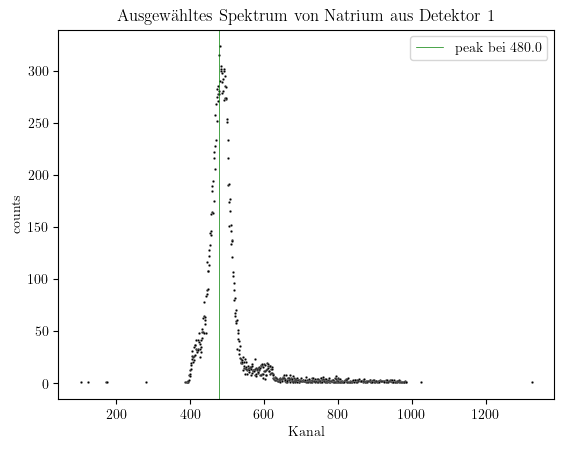

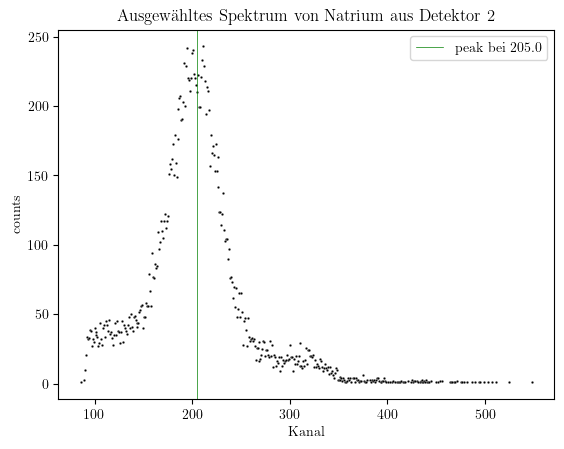

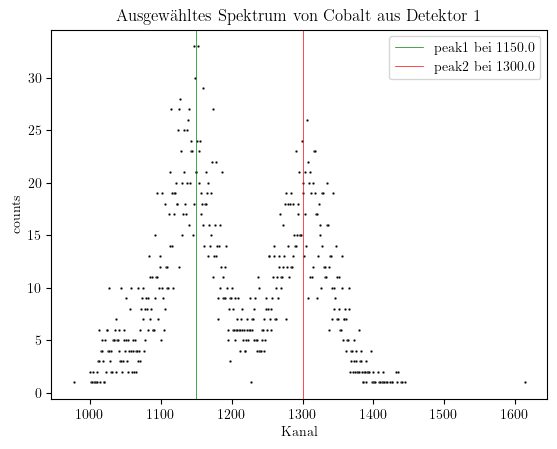

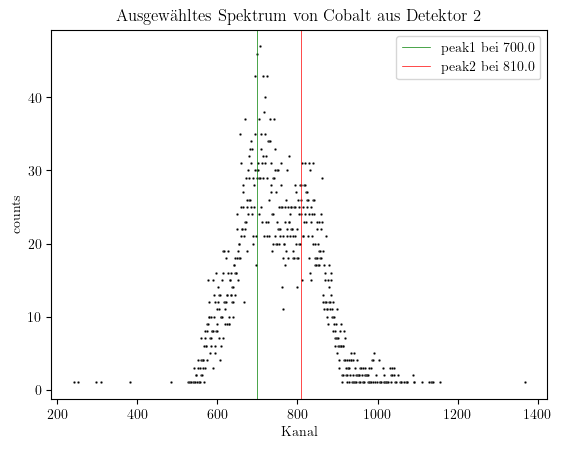

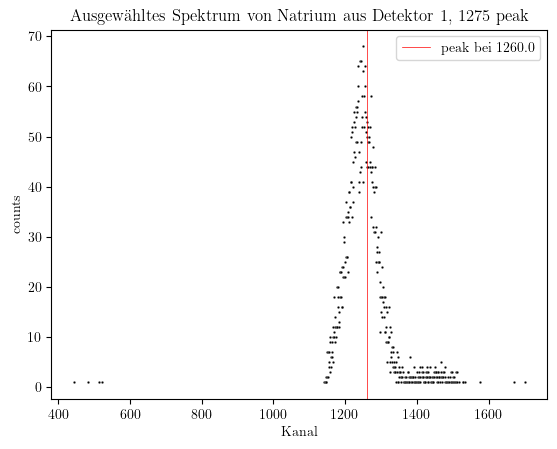

In [4]:
energyplot('Results/energieselektion_natrium_detektor1.asc', peak('D1','p1','na'), 'Ausgewähltes Spektrum von Natrium aus Detektor 1')
energyplot('Results/energieselektion_natrium_detektor2.asc', peak('D2','p1','na'), 'Ausgewähltes Spektrum von Natrium aus Detektor 2')
energyplot('Results/energieselektion_cobalt_detektor1.asc', peak('D1','p1','co'), 'Ausgewähltes Spektrum von Cobalt aus Detektor 1', peak2=peak('D1','p2','co'))
energyplot('Results/energieselektion_cobalt_detektor2.asc', peak('D2','p1','co'), 'Ausgewähltes Spektrum von Cobalt aus Detektor 2', peak2=peak('D2','p2','co'))
energyplot('Results/energieselektion_natrium_detektor1_gamma-peak.asc', peak('D1','p2','na'), 'Ausgewähltes Spektrum von Natrium aus Detektor 1, 1275 peak', color1='r')

Despite looking at the same source and detector, the measurement of the peaks show a slightly different peak than the measurement of the complete spectra, \
I.e. the peak2 of sodium at detector 1 lies at 1260 for the complete spectrum measurement, but lies at 1250 for the selection measurement
This means that a rerun will give different results. The difference is tiny, but noticeable.